Fraud Detection and Prediction - Classical
===========================================

***Classical Models Used***
* Linear Model
* K-Nearest Neighbour
* Naiyve Bayes
* Decision Tree
* Random Forest
* Support Vector Machine (Sigmoid, Linear, Poly, RBF) - Under-Sampling

Both Over-Sampling and Under-Sampling is used 

**Author:** *Bipul Sinha*


# 0. Pre-requisite -> Loading Dataset
 - Fraud Detection dataset will be loaded from Kaggle
 - Link @link(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
 
 *Note: - Run these steps only for the 1st time to download dataset from Kaggle or you haven't downloaded it earlier*

In [3]:
%pip install --upgrade kaggle numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kaggle in c:\users\bipulsinha\appdata\local\programs\python\python311\lib\site-packages (1.6.14)
  Using cached numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata (60 kB)




[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = './' 

In [4]:
!chmod 600 ./kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!chown `whoami`: ./kaggle.json

'chown' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip \*.zip && rm *.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
import shutil
import os

# Replace 'your_zip_file.zip' with the name of your zip file
zip_file = 'creditcardfraud.zip'

extract_dir = 'dataset'

# Check if the zip file exists
if os.path.exists(zip_file):
    # Run the unzip command
    #subprocess.run(['unzip', zip_file])
    #print('The zip file is :', os.path)
    # Create the destination directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)
    
    # Extract the contents of the zip file
    shutil.unpack_archive(zip_file, extract_dir)
else:
    print("The zip file doesn't exist.")


In [4]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
import os

import time


# 1. Data Exploration

## Load data from CSV file

In [5]:
df = pd.read_csv('./dataset/creditcard.csv')
df.describe().T # Data Summary

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

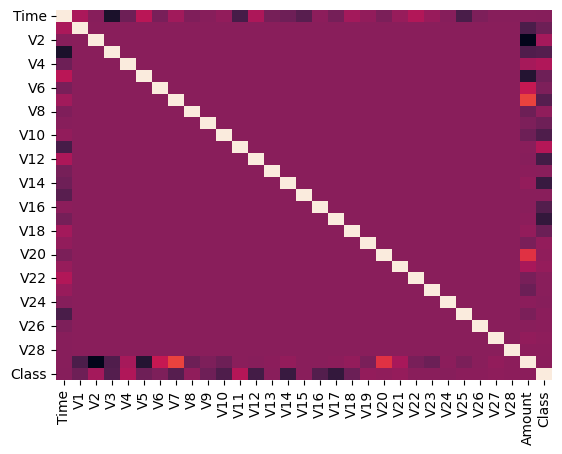

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot=False, fmt=".2f", cbar=False)
plt.show()

## Understanding and evaluating data
* Since, we are unable to see data from other than Class 0, we need data evaluation.
* Plus, the number of instances of fraudelent data are less in numbers we need to pump-up the fraudelent data.

In [15]:
df.shape #Prints number of rows and columns

(284807, 31)

In [16]:
class_count = df["Class"].value_counts()
class_count

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
print("Class 0 :" , class_count[0])
print("Class 1 :" , class_count[1])

Class 0 : 284315
Class 1 : 492


In [18]:
df.shape

(284807, 31)

Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces
0: 284315
1: 492
Imbalance degree: 1: 577.88
 
Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


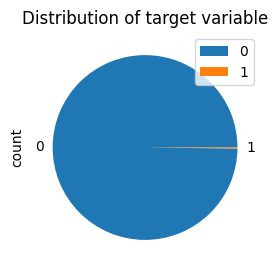

In [19]:
import pylab
pylab.rcParams['figure.figsize'] = (8, 5)

# Target distribution
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces')
target_count = df['Class'].value_counts()
print('0:', target_count[0])
print('1:', target_count[1])
print('Imbalance degree:', '1:', round(target_count[0] / target_count[1], 2))
print (' ')
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %')
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)


pylab.rcParams['figure.figsize'] = (4, 3)
target_count.plot(kind='pie', title='Distribution of target variable', legend="true");

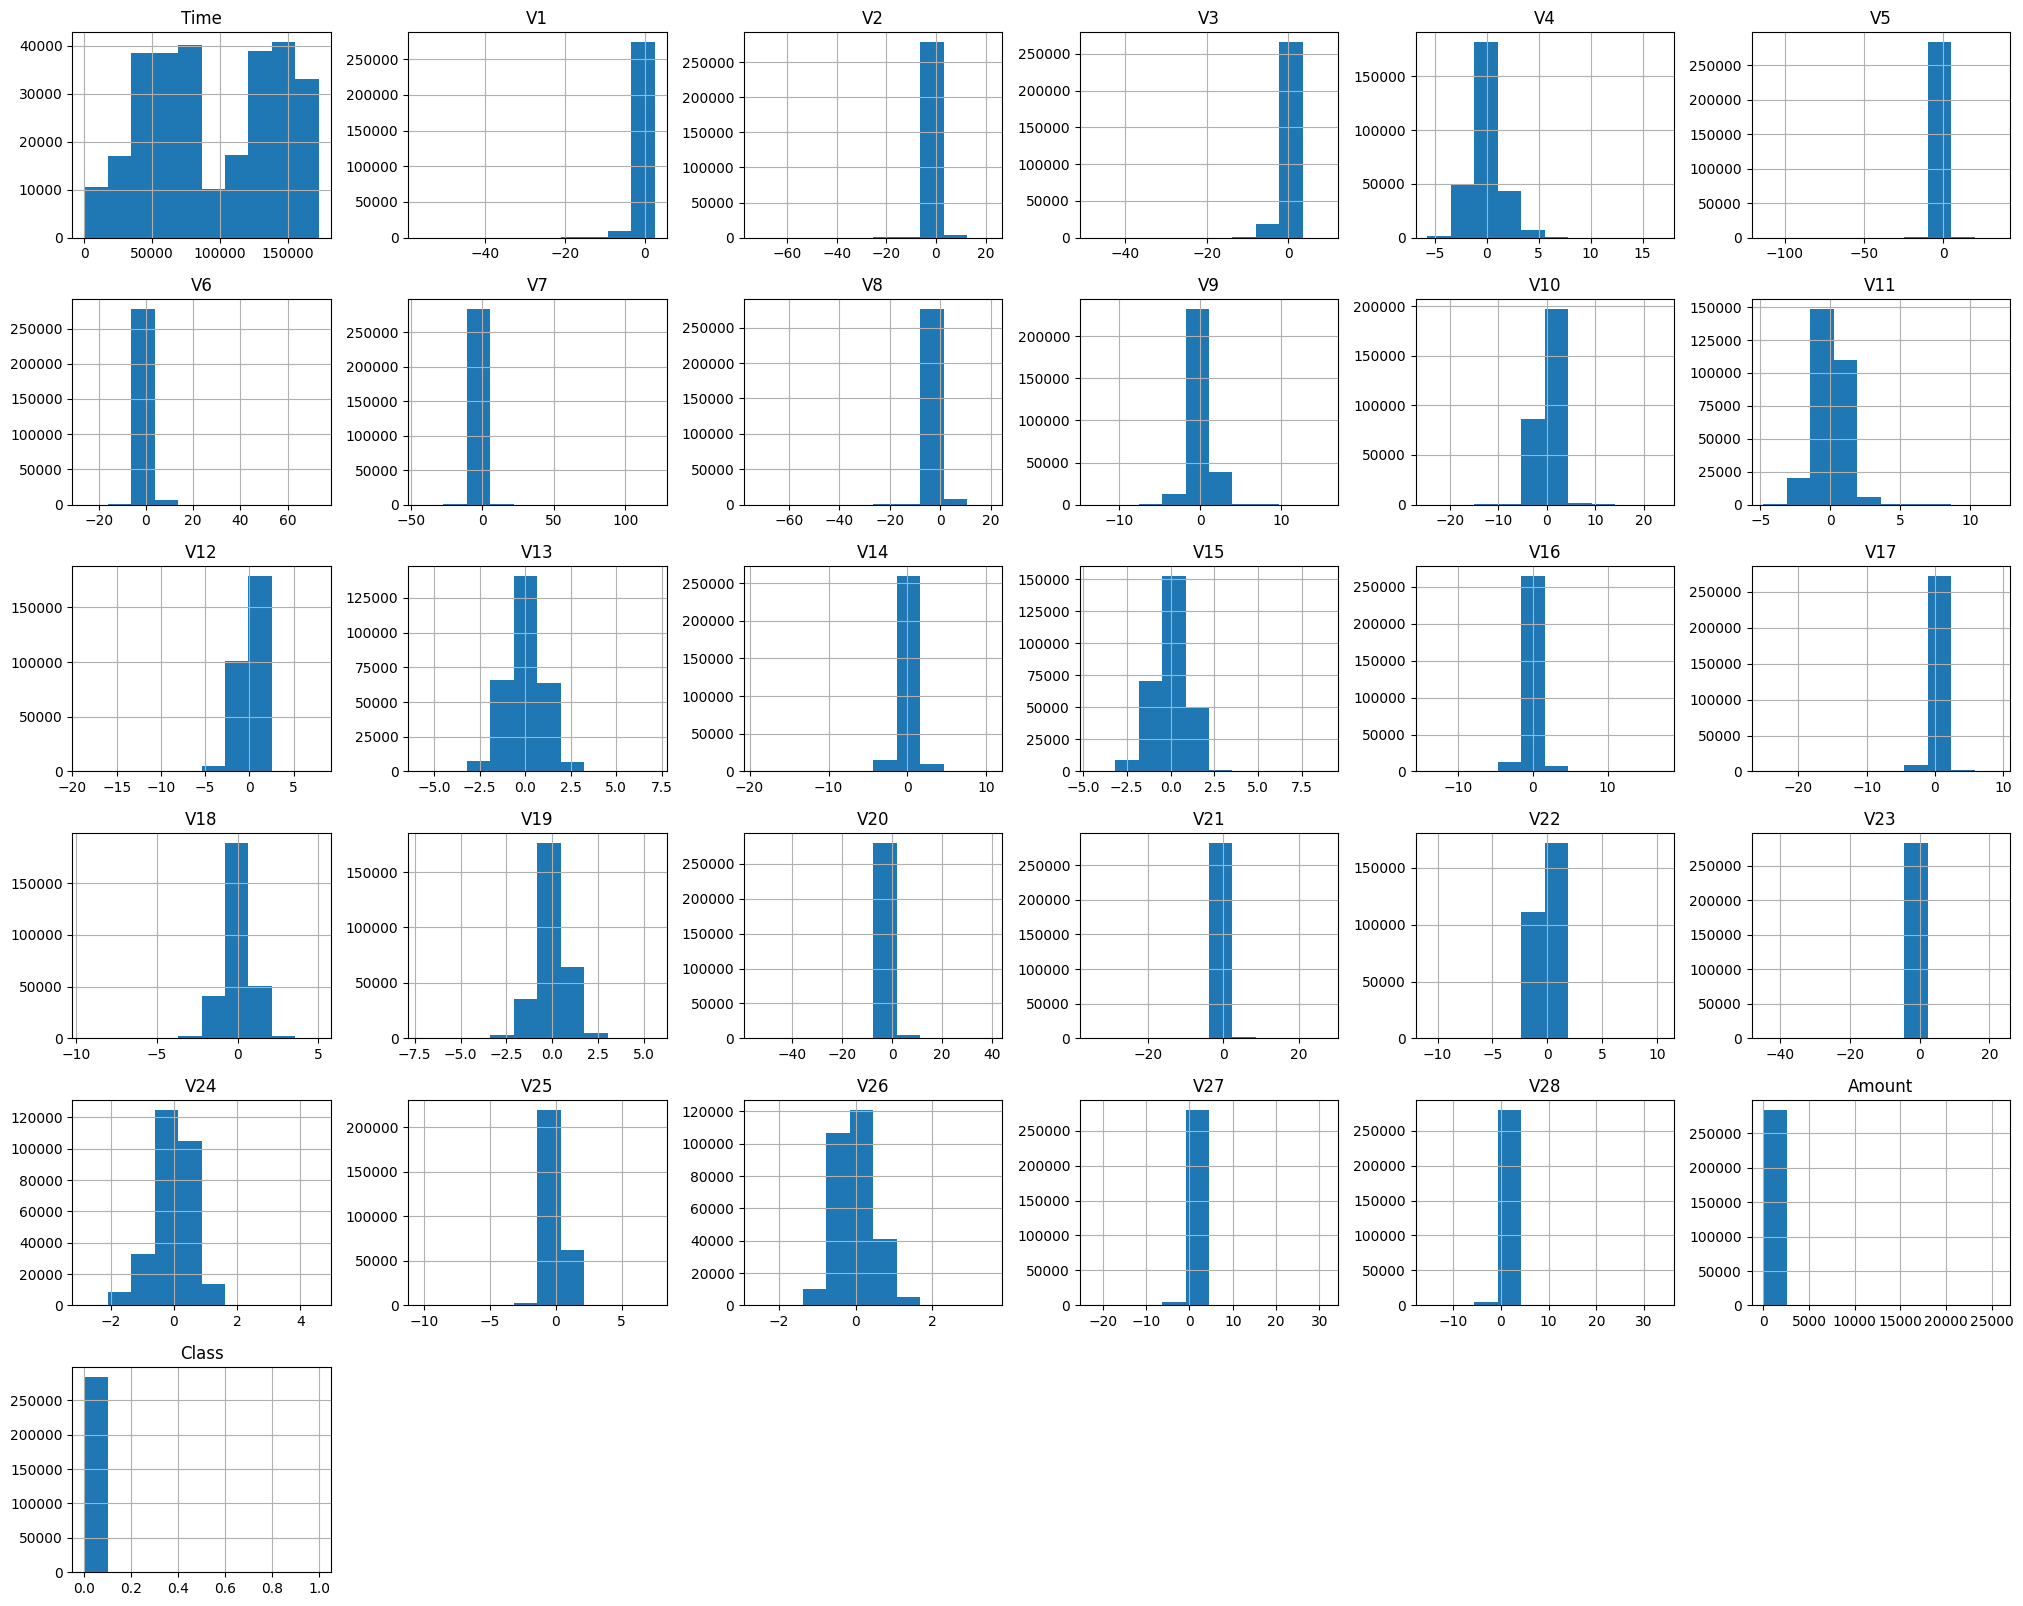

In [20]:
df.hist(figsize=(25,20))
plt.show()

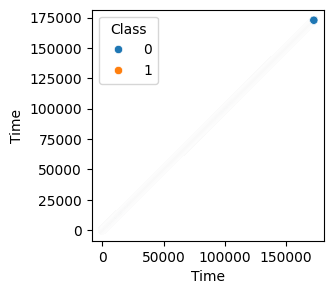

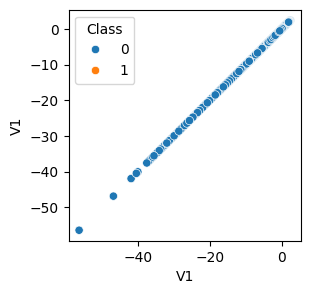

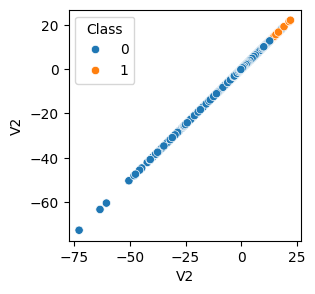

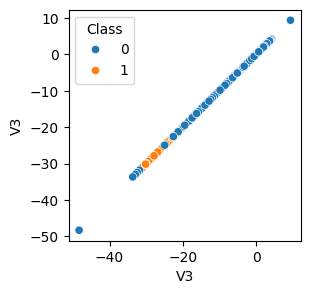

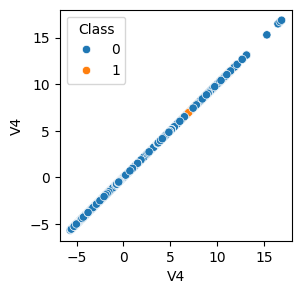

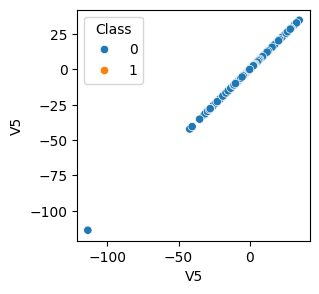

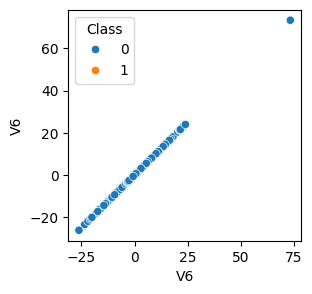

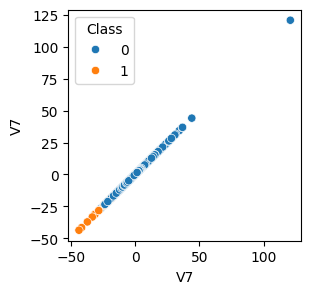

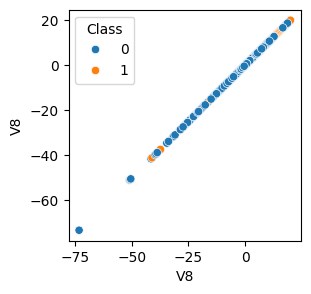

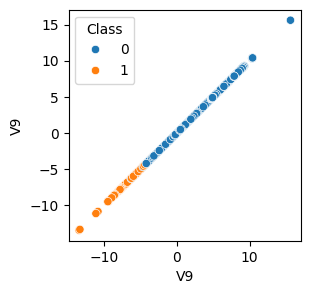

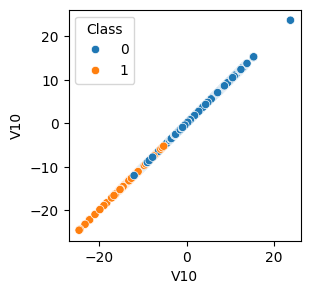

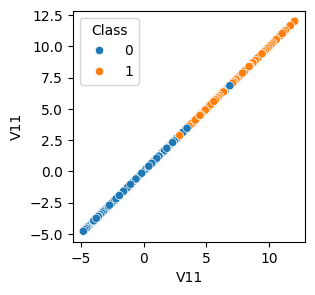

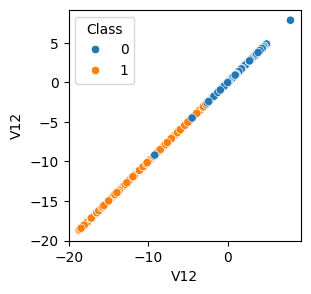

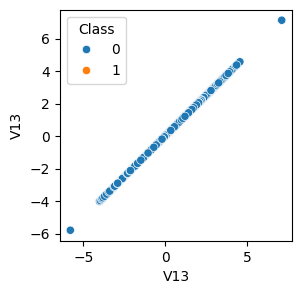

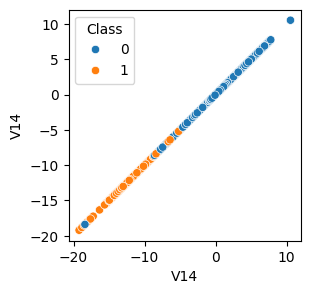

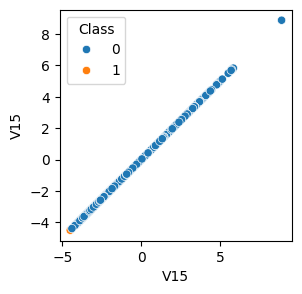

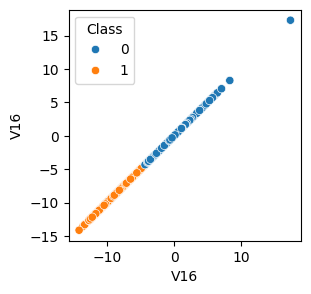

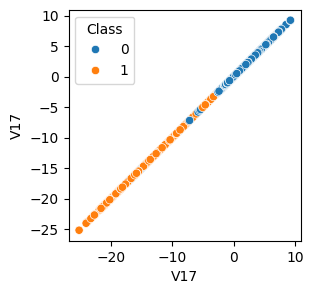

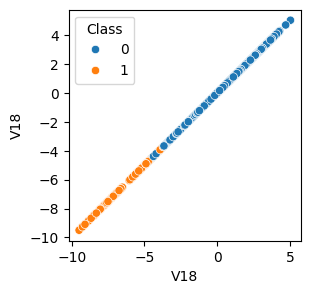

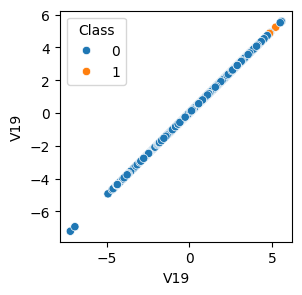

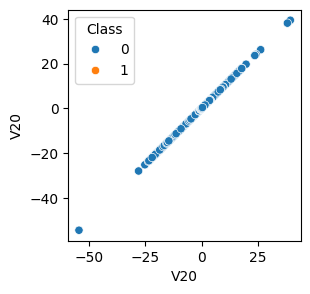

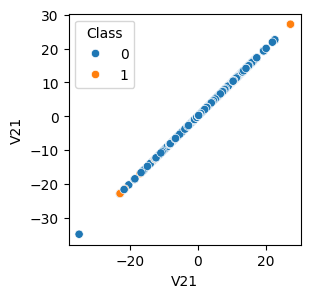

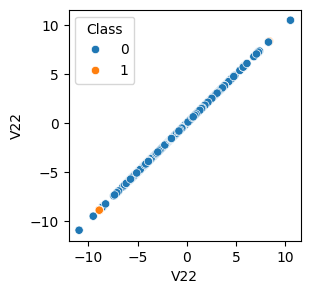

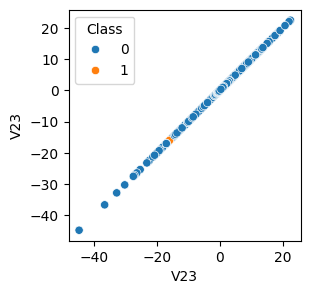

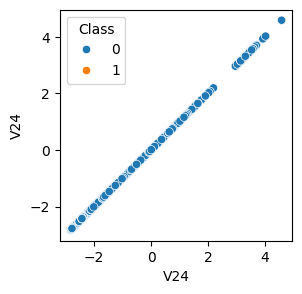

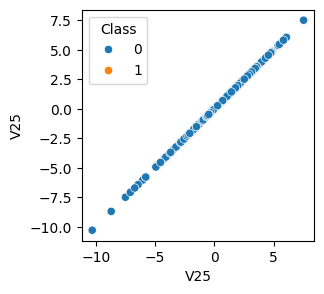

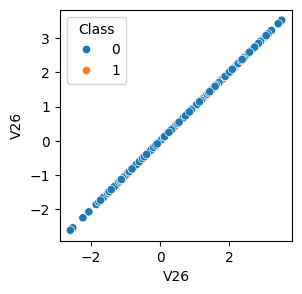

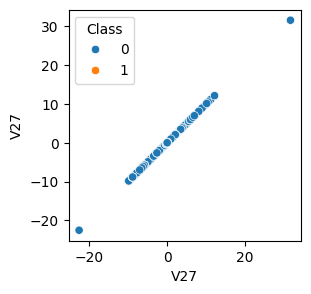

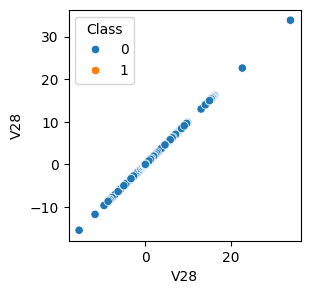

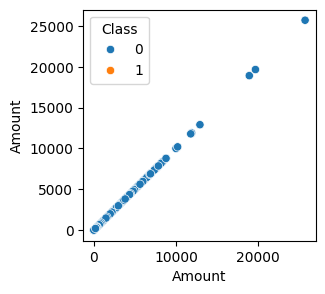

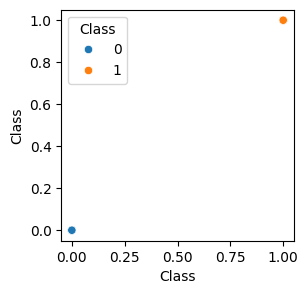

In [21]:
import numpy as np

features = list(df.columns)  # Assuming "Class" is not a feature
correlations = np.abs(df.corr())  # Get absolute correlations
strong_correlations = np.where(correlations > 0.7)  # Adjust threshold as needed
feature_pairs = [(features[i], features[j]) for i, j in zip(*strong_correlations)]



for x, y in feature_pairs:
    plt.figure(figsize=(3,3))
    #plt.subplots(2,2,figsize=(3,3) )
    sns.scatterplot(x=x, y=y, hue="Class", data=df, palette="tab10")
    plt.show()


In [22]:
#sns.pairplot(df.sample(1000), hue="Class", palette="tab10")
#plt.show()
# Reduce data size (optional)
# sample_size = 1000
# df_sample = df.sample(sample_size)

# Use individual scatter plots
#import matplotlib.pyplot as plt

#features = list(df.columns)  # Assuming "Class" is not a feature

#for i in range(len(features) - 1):
#  for j in range(i + 1, len(features)):
#    sns.scatterplot(
#        x=features[i], y=features[j], hue="Class", data=df, palette="tab10",
#    )
#    plt.show()  # Display each plot individually

# Free up memory (optional)
import gc; gc.collect()


54127

## Data Cleansing
* Since, the number of instances of 0 is 284315 and for Class 1 it is mere 492, we need to resolve data imbalance. This could be done by either Over-Sampling or Under-Sampling
* But prior to that, we need to figure out instances of duplicates and clean the data from such instances

### Removing Duplicates

In [23]:
df.duplicated().any
df.duplicated().sum()

1081

In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Solving Data Imbalance Problem

#### Get X-Axis and Y-Axis data

In [25]:
# Taking columns v1 to v28 plus amount and remocing Class
x= df.iloc[:,1:29].values # Remove .values to view data in tabular structure
x

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [26]:
# Considering class as Y attribute
y = df.iloc[:,30].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### A. Over-Sampling 
Let's first consider Over-Sampling and at the end we will use Under-Sampling and use SVC modelling using under-sampled data.

Now, lets pump up the data for Class- 1

In [27]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x,y)
print(x_resampled)
print(y_resampled)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ... -1.89114844e-01
   1.33558377e-01 -2.10530535e-02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ...  1.25894532e-01
  -8.98309914e-03  1.47241692e-02]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -1.39096572e-01
  -5.53527940e-02 -5.97518406e-02]
 ...
 [-4.06400474e+00  3.10093489e+00 -1.18849800e+00 ... -4.09862744e-01
  -3.03627133e+00 -6.30605199e-01]
 [-9.16978982e+00  7.09219680e+00 -1.23540369e+01 ... -2.64324609e-01
   1.15969046e+00  2.32758088e-01]
 [-2.32692237e+00 -3.34843873e+00 -3.51340796e+00 ...  5.31910616e-01
   3.02324354e-01  5.36375348e-01]]
[0 0 0 ... 1 1 1]


In [29]:
from collections import Counter
Counter(y_resampled).items()
# Now, we can see that the data for both Class 0 and Clas 1 are now same. So the data is Balanced.

dict_items([(0, 283253), (1, 283253)])

## Data Division into test and train data

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x_resampled,y_resampled, test_size = 0.2)

print("X-train", len(x_train))
print("X-test", len(x_test))
print("Y-train", len(y_train))
print("Y-test", len(y_test))

labels = ['Class 0', 'Class 1']

X-train 453204
X-test 113302
Y-train 453204
Y-test 113302


# 2. Model Training and Fraud Prediction

### Helper Functions (To be used during Modelling and Prediction)

In [31]:
# Dictionary to store model result
comparison_results = {}

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from matplotlib import pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix based on true and predicted labels.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True labels.
    y_pred : array-like of shape (n_samples,)
        Predicted labels.
    labels : list of str
        List of class labels.
    """
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize confusion matrix using heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



In [33]:
# The ROC curve plots the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis as the discrimination threshold is varied.
#  - It helps visualize the model's ability to distinguish between fraudulent and legitimate transactions.
#  - A model with a higher AUC (Area Under the Curve) is generally better at discrimination.

def plot_roc_curve(y_true, y_pred):
  """
  Plots the ROC curve for a model.

  Parameters:
    y_true : array-like of shape (n_samples,)
      True labels.
    y_pred : array-like of shape (n_samples,)
      Predicted probabilities.
  """
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--', label='No Discrimination')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()



In [34]:
# Precision-Recall Curve(Use for Imbalanced DataSet):

# - The precision-recall curve plots Precision (positive predictive value) on the y-axis against Recall (true positive rate) on the x-axis as the classification threshold is varied.
# - This is useful when dealing with imbalanced datasets, where positive cases (fraudulent transactions) might be rare.
# - A model with a curve that stays closer to the top-left corner indicates a better balance between precision and recall.
def plot_precision_recall_curve(y_true, y_pred):
  """
  Plots the precision-recall curve for a model.

  Parameters:
    y_true : array-like of shape (n_samples,)
      True labels.
    y_pred : array-like of shape (n_samples,)
      Predicted labels.
  """
  precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, label='Precision-Recall Curve')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.show()



In [35]:
# Distribution Plots:

# - Create histograms or kernel density estimation (KDE) plots to visualize the distribution of features or predicted probabilities for both fraudulent and legitimate transactions.
# - This can help identify potential patterns or outliers that might be related to fraudulent activity.

def plot_distribution(data, feature_name, class_label="class_label", kind="kde"):
  """
  Plots the distribution of a feature for different classes.

  Parameters:
    data : pandas DataFrame
      DataFrame containing the data.
    feature_name : str
      Name of the feature to plot.
    class_label : str, optional
      Name of the class label column (default: "class_label").
    kind : str, optional
      Plot kind (e.g., "hist" for histogram, "kde" for kernel density estimation).
  """
  sns.displot(data=data, x=feature_name, hue=class_label, kind=kind)
  plt.title(f'Distribution of {feature_name} by {class_label}')
  plt.show()



In [36]:
def plot_predicted_probability_distribution(y_pred, bins=10):
  """
  Plots the distribution of predicted probabilities.

  Parameters:
    y_pred : array-like
      Array of predicted probabilities.
    bins : int, optional
      Number of bins for the histogram (default: 10).
  """
  sns.displot(y_pred, bins=bins, kde=True)
  plt.title('Distribution of Predicted Probabilities')
  plt.show()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def show_result(y_test, y_pred, labels):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy::  {accuracy:.2f}")
    
    precision = precision_score(y_test, y_pred)
    print(f"Precision Score::  {precision:.2f}")
    
    recall = recall_score(y_test, y_pred)
    print(f"Recall Score::  {recall:.2f}")
    
   # f1score = f1_score(precision, recall)
    #print(f"F1-Score::  {f1score:.2f}")
    
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, labels)
    plot_roc_curve(y_test, y_pred)
    plot_predicted_probability_distribution(y_pred)
    
    return {"accuracy" : accuracy, "precision" : precision, "recall" : recall}


## Model 1 - Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
import time

logmodel = LogisticRegression(random_state=42)

start_time = time.time()

# Train the model
logmodel.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 1.00


In [39]:
start_time = time.time()

y_pred = logmodel.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to predict from the model:: {duration:.2f}")

y_pred

Time taken to predict from the model:: 0.01


array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
y_test

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix
#plot_confusion_matrix(y_test, y_pred, labels)
confusion_matrix(y_test, y_pred)

array([[55259,  1280],
       [ 4910, 51853]], dtype=int64)

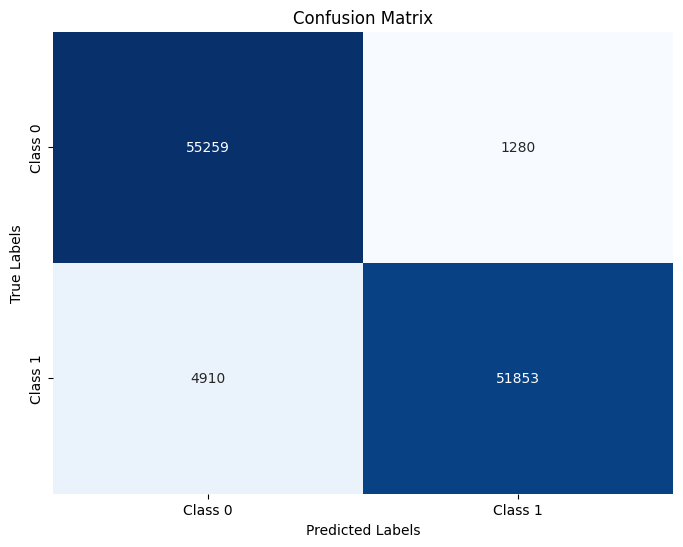

In [42]:
plot_confusion_matrix(y_test, y_pred, labels)

In [43]:
accuracy = logmodel.score(x_train, y_train)
print(f"Accuracy on train dataset::  {accuracy:.2f}")

accuracy = logmodel.score(x_test, y_test)
print(f"Accuracy on test dataset::  {accuracy:.2f}")

Accuracy on train dataset::  0.95
Accuracy on test dataset::  0.95


In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy
print(f"Accuracy calcuated using accuracy_score::  {accuracy:.2f}")

Accuracy calcuated using accuracy_score::  0.95


Accuracy::  0.95
Precision Score::  0.98
Recall Score::  0.91


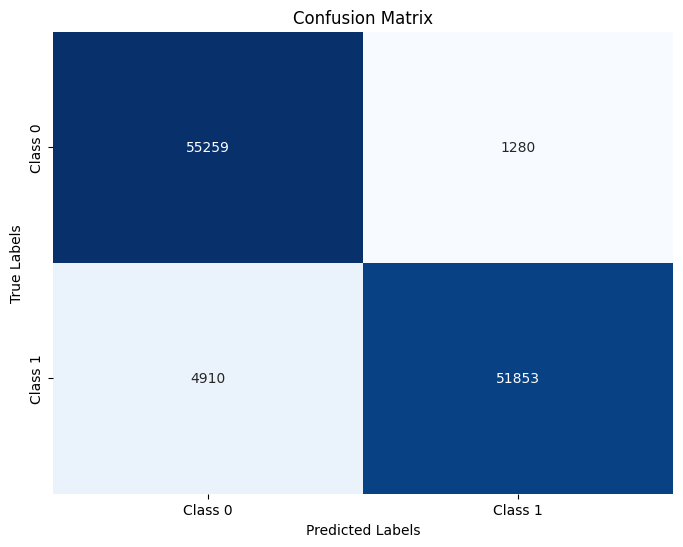

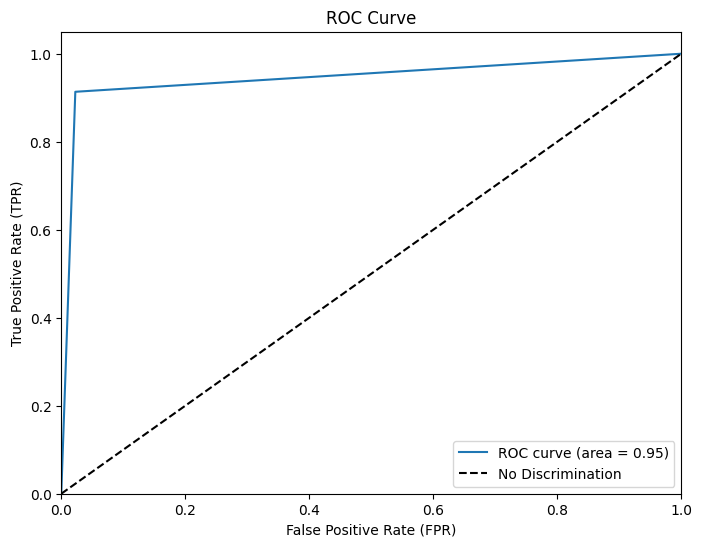

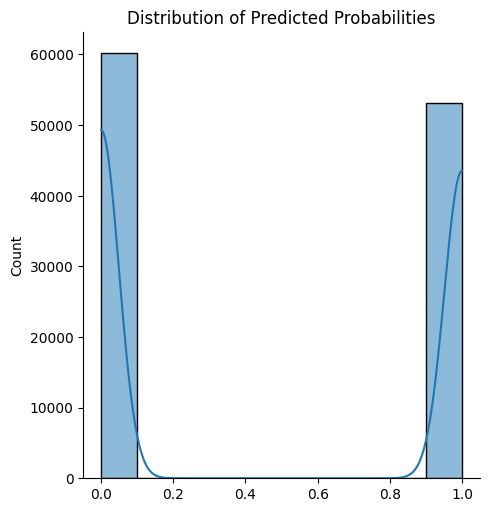

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}}


In [45]:
comparison_results["LogisticRegression"] = show_result(y_test, y_pred, labels)
print(comparison_results)

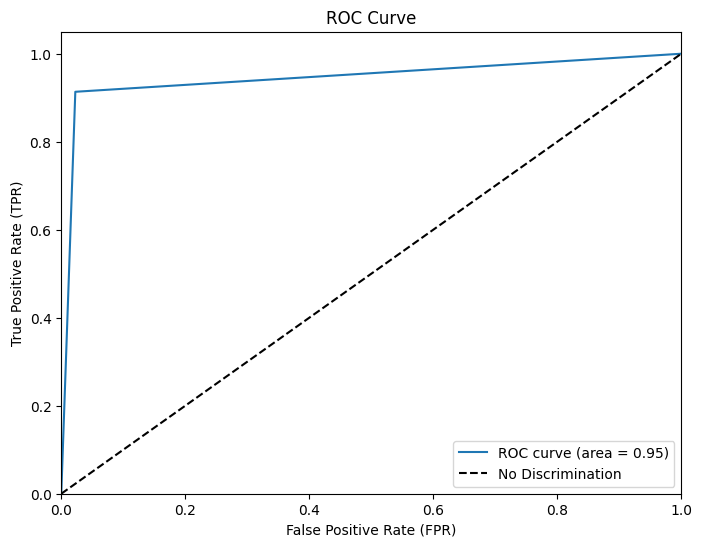

In [46]:
plot_roc_curve(y_test, y_pred)

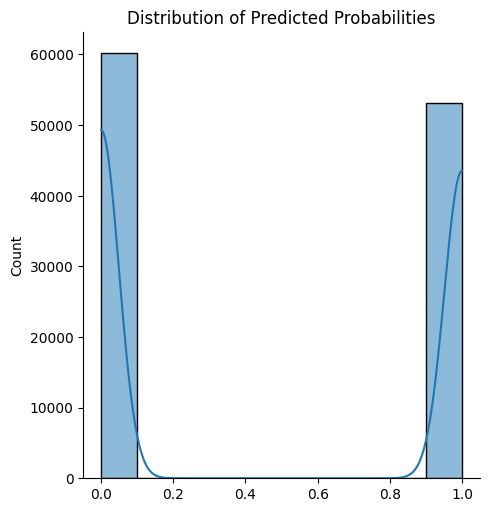

In [47]:
plot_predicted_probability_distribution(y_pred)

## Model 2. K Nearest Neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5, metric="minkowski", p=2)

start_time = time.time()

#training the model
knn_model.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 0.05


In [49]:
start_time = time.time()

y_pred = knn_model.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to test the model:: {duration:.2f}")

Time taken to test the model:: 98.36


In [50]:
confusion_matrix(y_test, y_pred)

array([[56505,    34],
       [    0, 56763]], dtype=int64)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:: ", accuracy)

Accuracy::  0.9996999170358863


Accuracy::  1.00
Precision Score::  1.00
Recall Score::  1.00


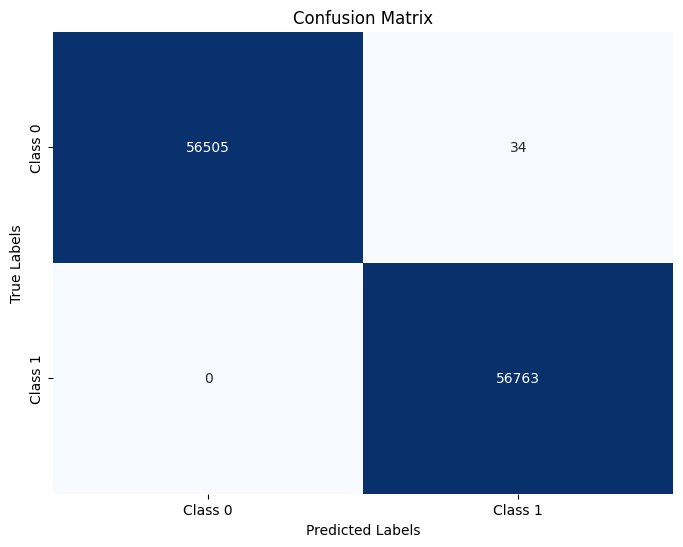

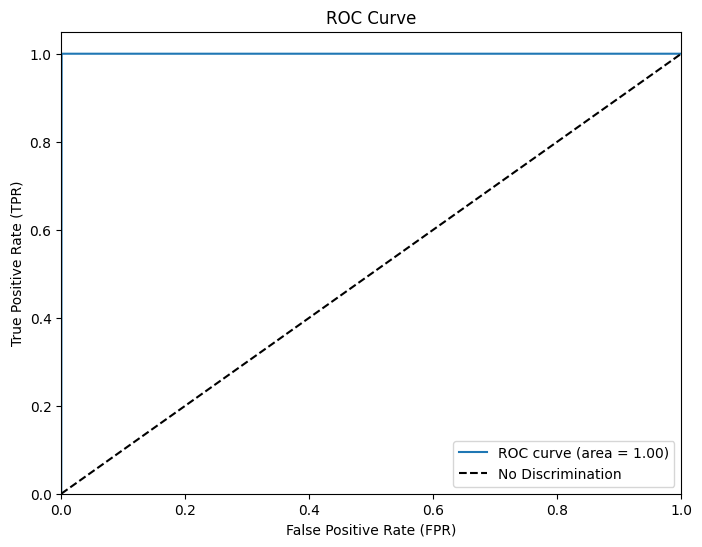

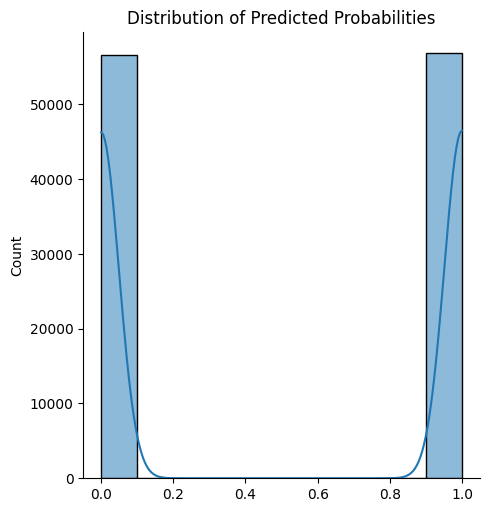

Accuracy::  1.00
Precision Score::  1.00
Recall Score::  1.00


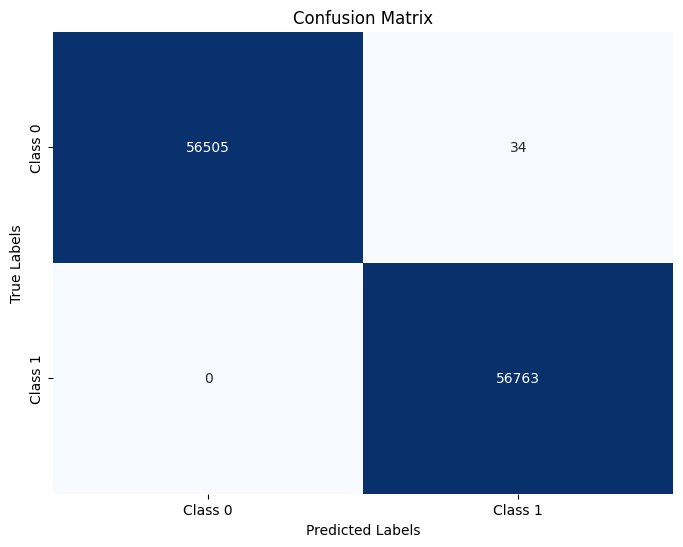

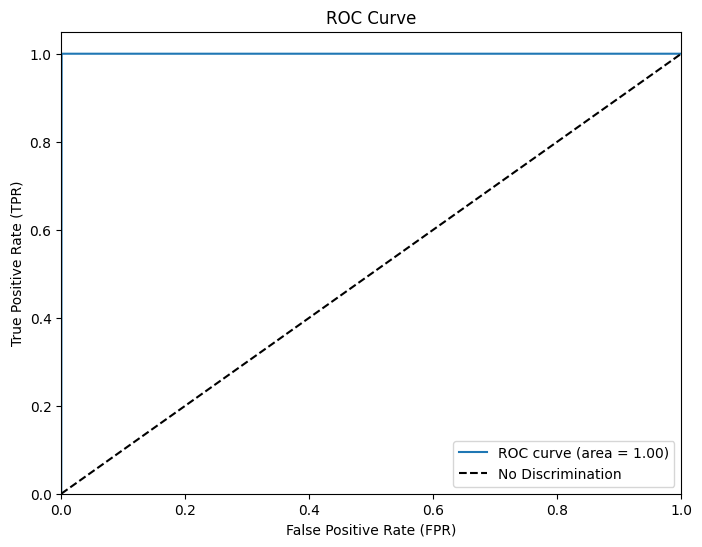

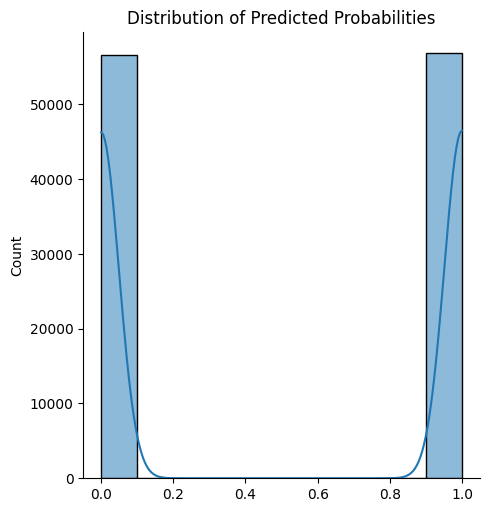

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}}


In [52]:
show_result(y_test, y_pred, labels)
comparison_results["kNN"] = show_result(y_test, y_pred, labels)
print(comparison_results)

## Model 3 - Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

start_time = time.time()

#Train the model
nb_model.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")


Time taken to train the model:: 0.34


In [54]:
start_time = time.time()
y_pred = nb_model.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to test the model:: {duration:.2f}")

Time taken to test the model:: 0.10


In [55]:
confusion_matrix(y_test, y_pred)

array([[55096,  1443],
       [ 8268, 48495]], dtype=int64)

Accuracy::  0.91
Precision Score::  0.97


Recall Score::  0.85


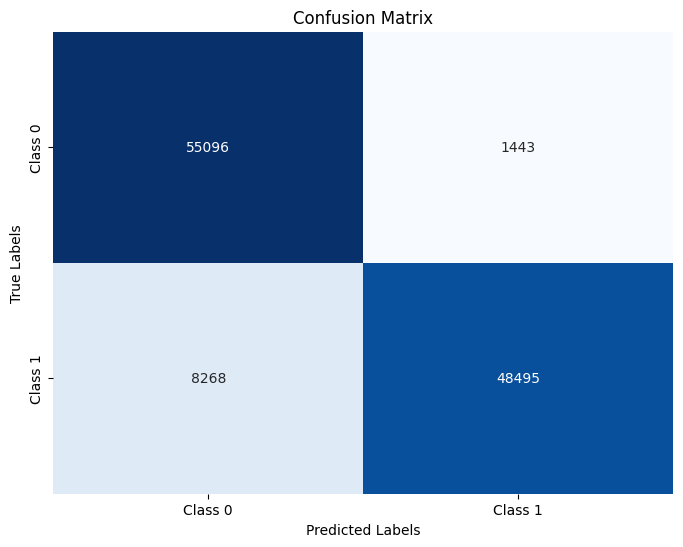

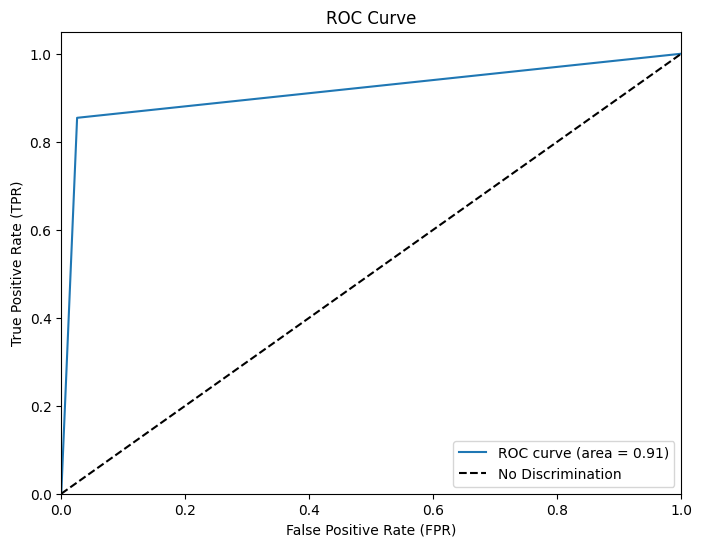

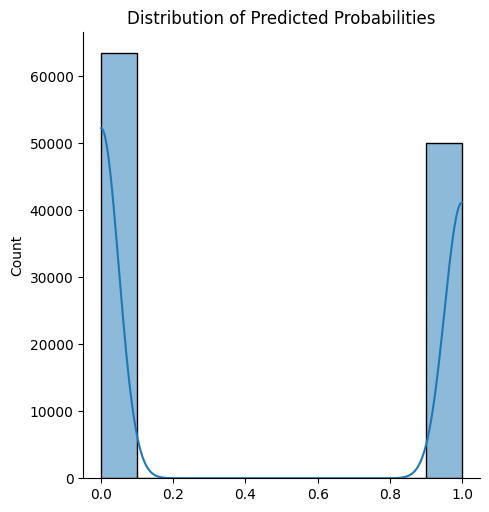

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}}


In [56]:
comparison_results["NaiveBayes"] = show_result(y_test, y_pred, labels)
print(comparison_results)

## Model 4 - Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion="entropy")

start_time = time.time()

#train the model
dtmodel.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 12.29


In [58]:
start_time = time.time()

y_pred = dtmodel.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to test the model:: {duration:.2f}")

Time taken to test the model:: 0.02


In [59]:
confusion_matrix(y_test, y_pred)

array([[56510,    29],
       [    0, 56763]], dtype=int64)

Accuracy::  1.00
Precision Score::  1.00
Recall Score::  1.00


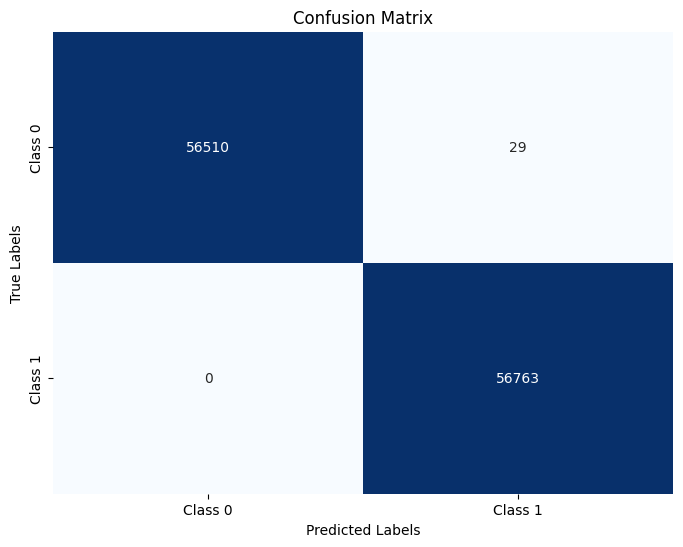

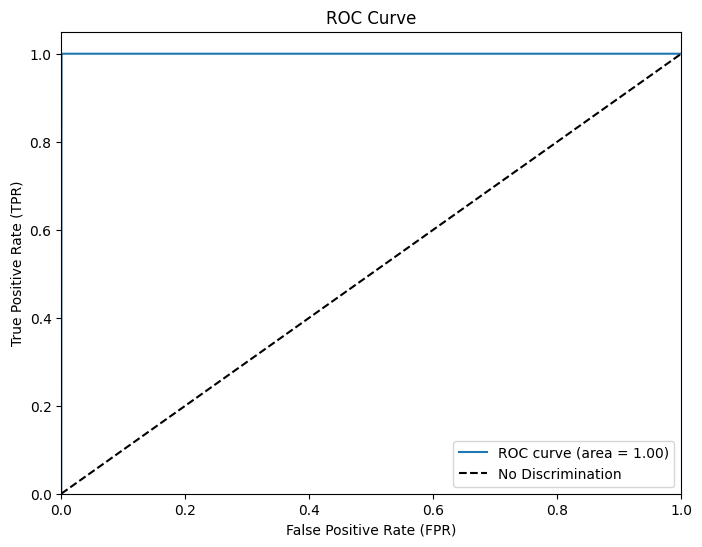

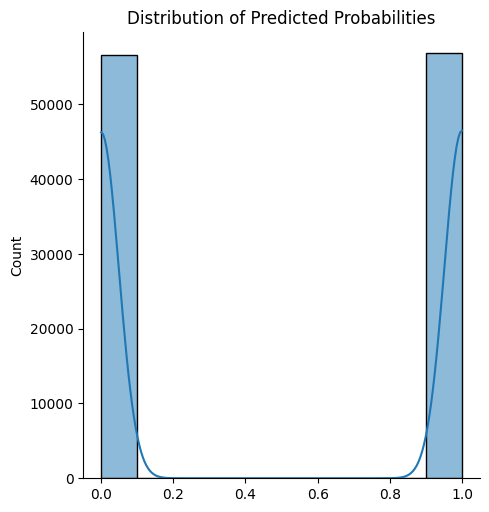

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}, 'DecisionTree': {'accuracy': 0.9997440468835501, 'precision': 0.9994893646992534, 'recall': 1.0}}


In [60]:
comparison_results["DecisionTree"] = show_result(y_test, y_pred, labels)
print(comparison_results)

## Model 5. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(criterion = 'entropy')

start_time = time.time()
#train the model
rfc_model.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 232.33


In [62]:
start_time = time.time()
# Test the model
y_pred =  rfc_model.predict(x_test)
                            
end_time = time.time()
duration = end_time - start_time
print(f"Time taken to test the model:: {duration:.2f}")

Time taken to test the model:: 0.68


In [63]:
confusion_matrix(y_test, y_pred)

array([[56535,     4],
       [    0, 56763]], dtype=int64)

Accuracy::  1.00
Precision Score::  1.00
Recall Score::  1.00


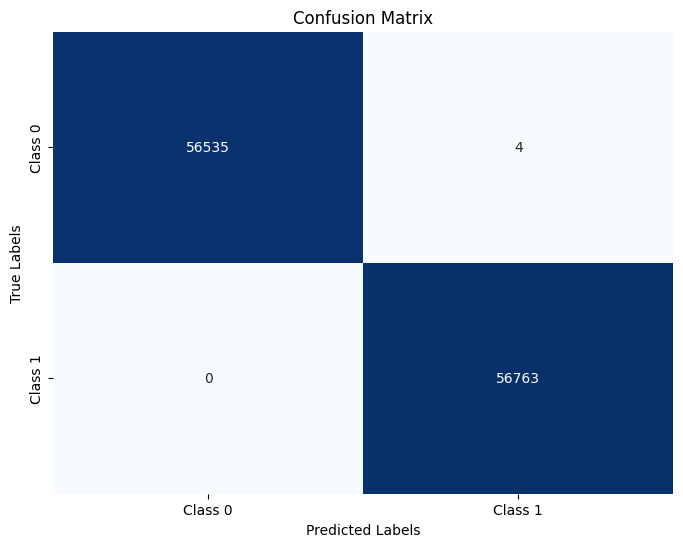

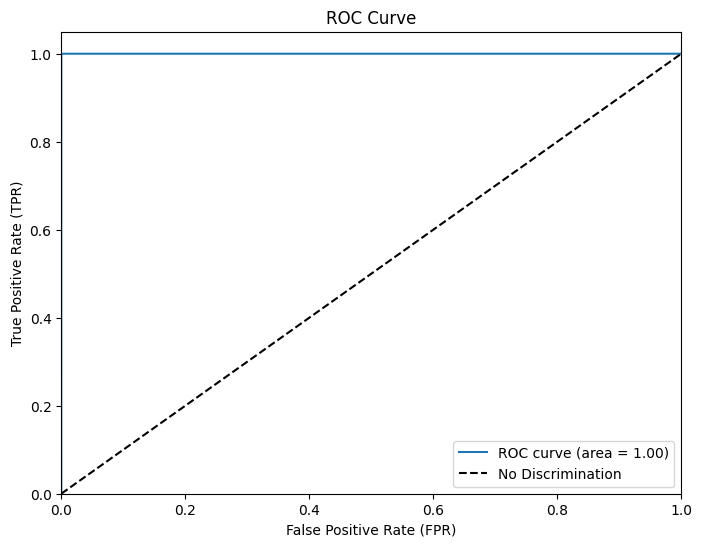

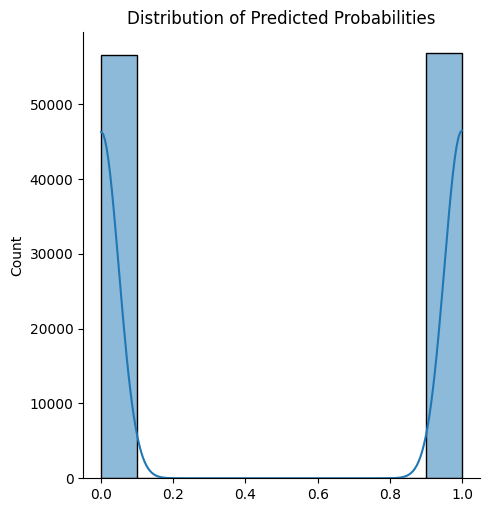

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}, 'DecisionTree': {'accuracy': 0.9997440468835501, 'precision': 0.9994893646992534, 'recall': 1.0}, 'RandomForest': {'accuracy': 0.999964696121869, 'precision': 0.9999295365265031, 'recall': 1.0}}


In [64]:
comparison_results["RandomForest"] = show_result(y_test, y_pred, labels)
print(comparison_results)

## Model 4 - Support Vector Machine - SVM

**I tried using SVM on oversampling but it is taking a whole lot of time so moving to undersampling methodology.**

### B. Under-Sampling

In [65]:
from imblearn.under_sampling import RandomUnderSampler

# Create the undersampler object
rus = RandomUnderSampler(random_state=0)  # Set a random state for reproducibility

# Fit and apply the undersampling to your data
x_resampled, y_resampled = rus.fit_resample(x, y)

# Print the resampled data
print(x_resampled)
print(y_resampled)


[[ 9.21558438e-02  2.72980513e-01  1.65691062e+00 ...  2.18578853e-01
  -8.97105238e-01 -6.68943863e-01]
 [ 1.94820162e+00  8.67320384e-01 -9.69015749e-01 ... -2.09634452e-02
  -8.35877932e-02 -6.34145592e-02]
 [-2.90276096e-01  1.11428452e+00  1.21201151e+00 ... -5.18210738e-01
   2.17039624e-01  2.40873700e-01]
 ...
 [-6.76142671e-01  1.12636606e+00 -2.21369952e+00 ...  4.71110963e-01
   3.85107449e-01  1.94361479e-01]
 [-3.11383161e+00  5.85864172e-01 -5.39973021e+00 ...  6.06115810e-01
   8.84875540e-01 -2.53700319e-01]
 [ 1.99197610e+00  1.58475887e-01 -2.58344065e+00 ... -2.89616586e-01
   2.98758224e-03 -1.53088128e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### Data Division

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x_resampled,y_resampled, test_size = 0.2)

print("X-train", len(x_train))
print("X-test", len(x_test))
print("Y-train", len(y_train))
print("Y-test", len(y_test))

labels = ['Class 0', 'Class 1']

X-train 756
X-test 190
Y-train 756
Y-test 190


### 1. Sigmoid

In [67]:
from sklearn.svm import SVC

svm_model_sigmoid = SVC(kernel = 'sigmoid')

start_time = time.time()
# Training the model
svm_model_sigmoid.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 0.01


In [68]:
start_time = time.time()
#Test the model
y_pred = svm_model_sigmoid.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to test the model:: {duration:.2f}")

Time taken to test the model:: 0.00


In [69]:
confusion_matrix(y_test, y_pred)

array([[82,  9],
       [15, 84]], dtype=int64)

Accuracy::  0.87
Precision Score::  0.90
Recall Score::  0.85


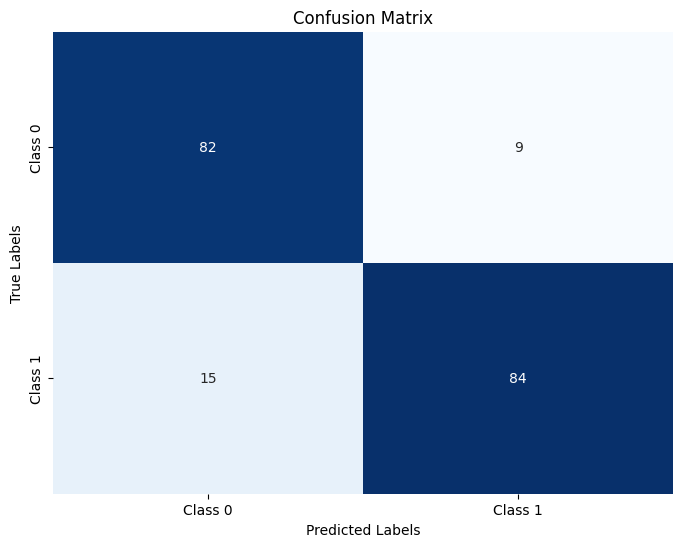

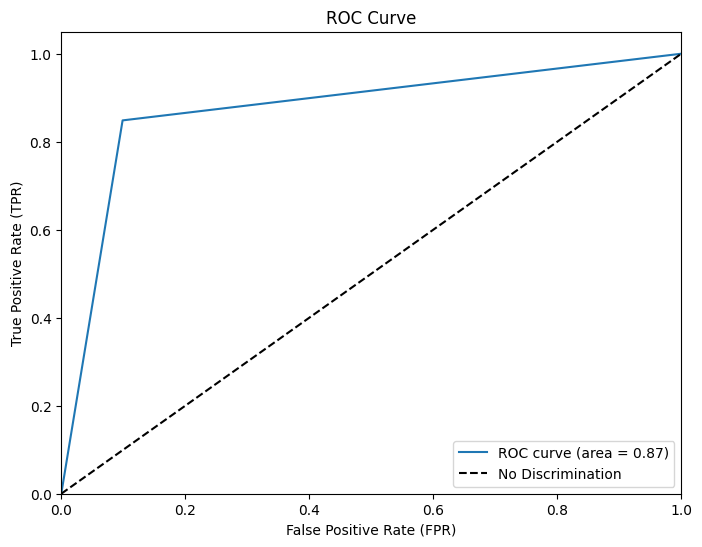

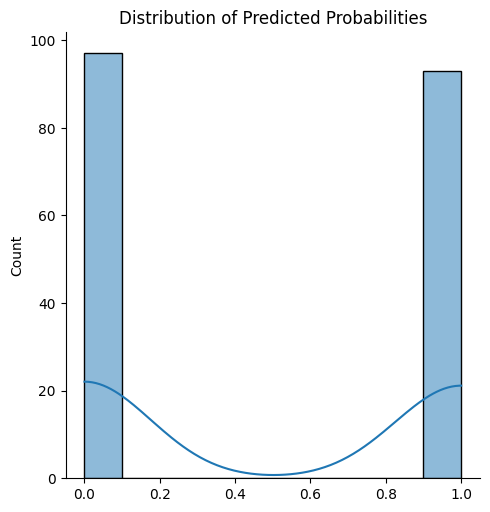

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}, 'DecisionTree': {'accuracy': 0.9997440468835501, 'precision': 0.9994893646992534, 'recall': 1.0}, 'RandomForest': {'accuracy': 0.999964696121869, 'precision': 0.9999295365265031, 'recall': 1.0}, 'SVC_Sigmoid': {'accuracy': 0.8736842105263158, 'precision': 0.9032258064516129, 'recall': 0.8484848484848485}}


In [70]:
comparison_results["SVC_Sigmoid"] = show_result(y_test, y_pred, labels)
print(comparison_results)

### 2. Linear

In [71]:
from sklearn.svm import SVC

svm_model_linear = SVC(kernel="linear")

start_time = time.time()
svm_model_linear.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 0.02


In [72]:
start_time = time.time()

# Test the model
y_pred = svm_model_linear.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to test the model:: {duration:.2f}")

Time taken to test the model:: 0.00


In [73]:
confusion_matrix(y_test, y_pred)

array([[88,  3],
       [12, 87]], dtype=int64)

Accuracy::  0.92
Precision Score::  0.97
Recall Score::  0.88


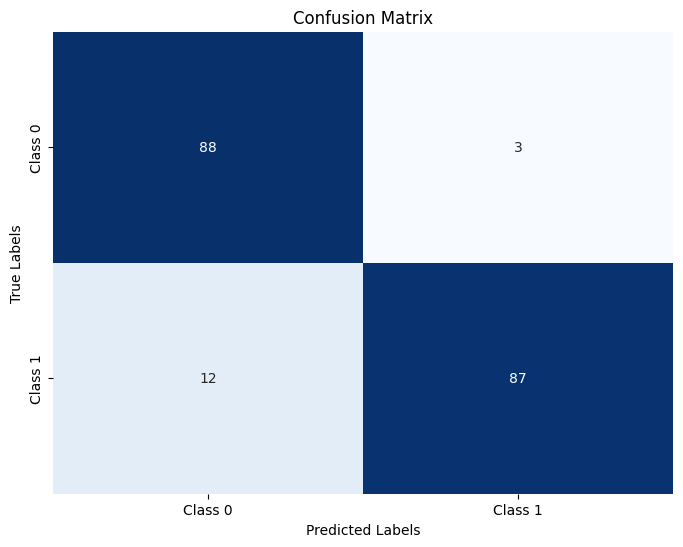

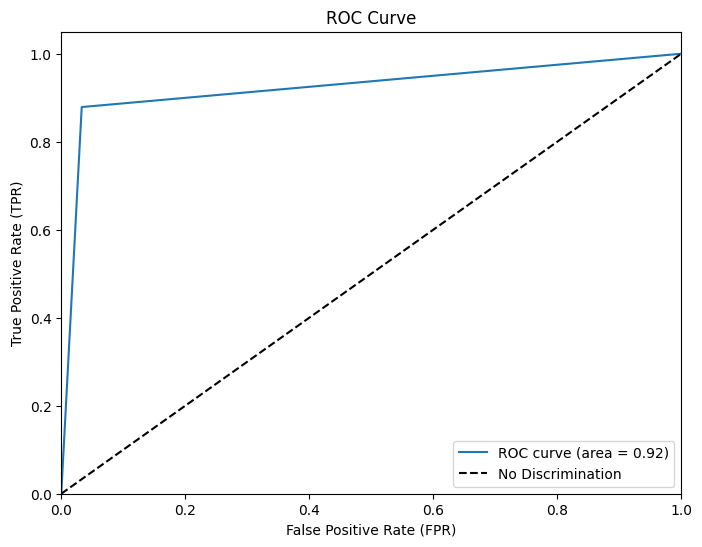

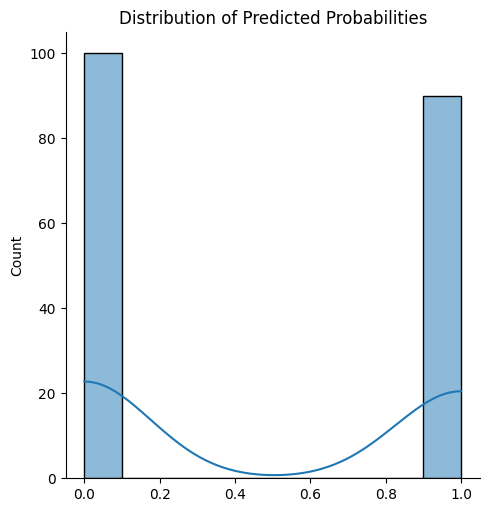

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}, 'DecisionTree': {'accuracy': 0.9997440468835501, 'precision': 0.9994893646992534, 'recall': 1.0}, 'RandomForest': {'accuracy': 0.999964696121869, 'precision': 0.9999295365265031, 'recall': 1.0}, 'SVC_Sigmoid': {'accuracy': 0.8736842105263158, 'precision': 0.9032258064516129, 'recall': 0.8484848484848485}, 'SVC_Linear': {'accuracy': 0.9210526315789473, 'precision': 0.9666666666666667, 'recall': 0.8787878787878788}}


In [74]:
comparison_results["SVC_Linear"] = show_result(y_test, y_pred, labels)
print(comparison_results)

### 3. Poly

In [75]:
svm_model_poly = SVC(kernel='poly')

start_time = time.time()

# Train the model
svm_model_poly.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 0.01


In [76]:
start_time = time.time()

# Test the model
y_pred = svm_model_poly.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 0.00


In [77]:
confusion_matrix(y_test, y_pred)

array([[91,  0],
       [22, 77]], dtype=int64)

Accuracy::  0.88
Precision Score::  1.00
Recall Score::  0.78


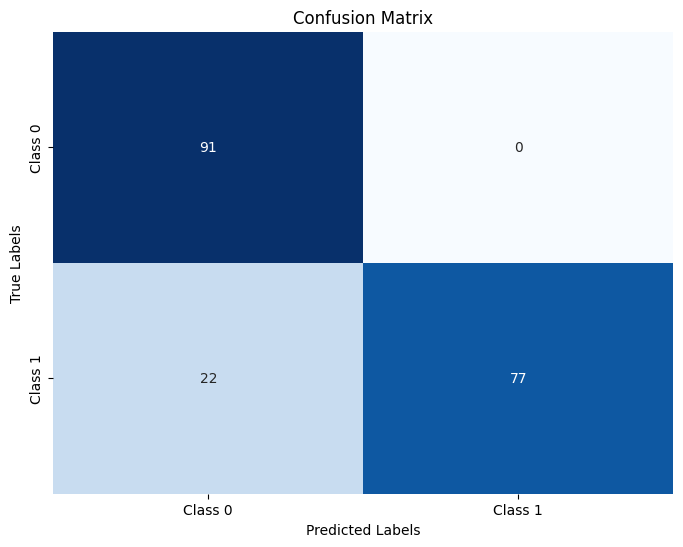

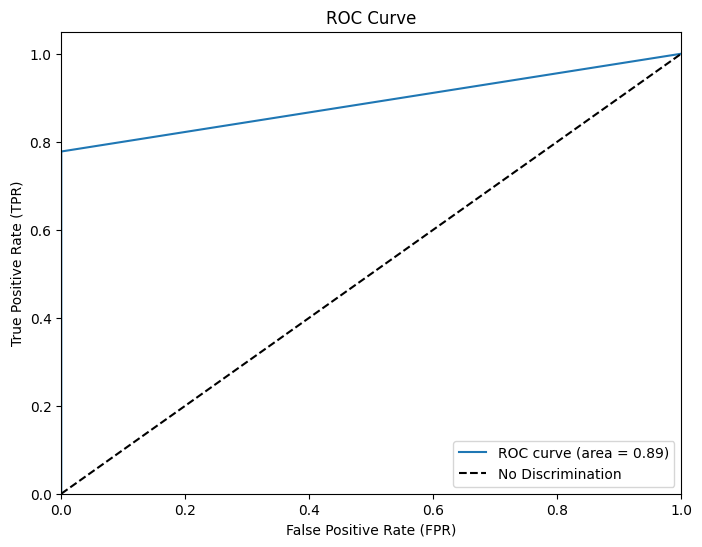

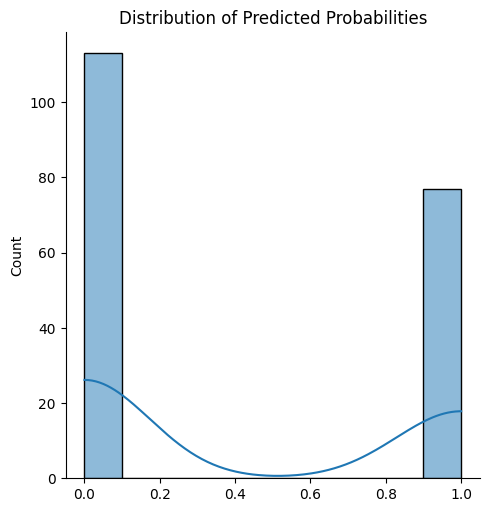

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}, 'DecisionTree': {'accuracy': 0.9997440468835501, 'precision': 0.9994893646992534, 'recall': 1.0}, 'RandomForest': {'accuracy': 0.999964696121869, 'precision': 0.9999295365265031, 'recall': 1.0}, 'SVC_Sigmoid': {'accuracy': 0.8736842105263158, 'precision': 0.9032258064516129, 'recall': 0.8484848484848485}, 'SVC_Linear': {'accuracy': 0.9210526315789473, 'precision': 0.9666666666666667, 'recall': 0.8787878787878788}, 'SVC_Poly': {'accuracy': 0.8842105263157894, 'precision': 1.0, 'recall': 0.7777777777777778}}


In [78]:
comparison_results["SVC_Poly"] = show_result(y_test, y_pred, labels)
print(comparison_results)

### 4. RBF

In [79]:
svm_model_rbf = SVC(kernel='rbf')

start_time = time.time()

# Train the model
svm_model_rbf.fit(x_train, y_train)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to train the model:: {duration:.2f}")

Time taken to train the model:: 0.01


In [80]:
start_time = time.time()

# Test the model
y_pred = svm_model_rbf.predict(x_test)

end_time = time.time()
duration = end_time - start_time
print(f"Time taken to test the model:: {duration:.2f}")

Time taken to test the model:: 0.00


In [81]:
confusion_matrix(y_test, y_pred)

array([[89,  2],
       [14, 85]], dtype=int64)

Accuracy::  0.92
Precision Score::  0.98
Recall Score::  0.86


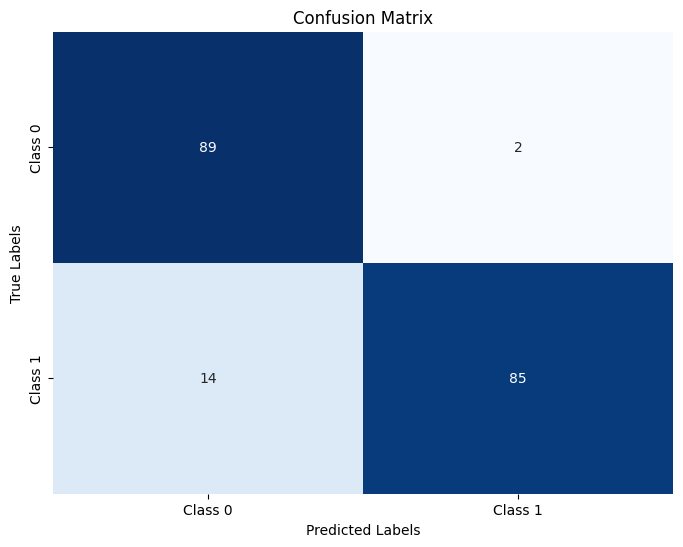

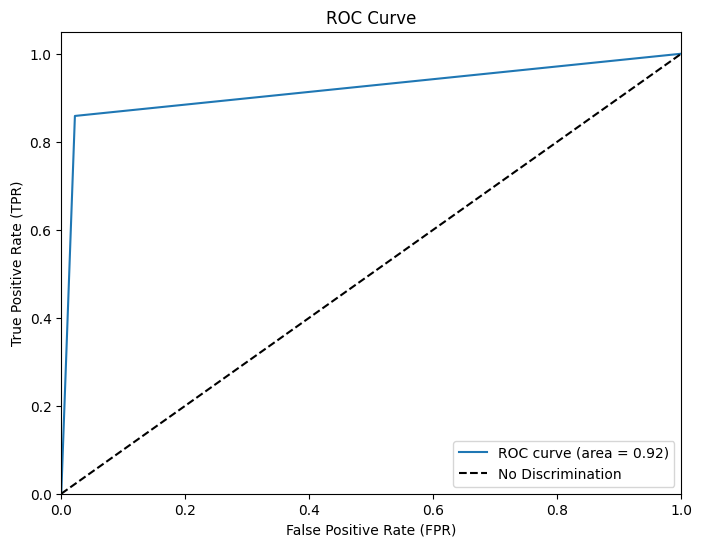

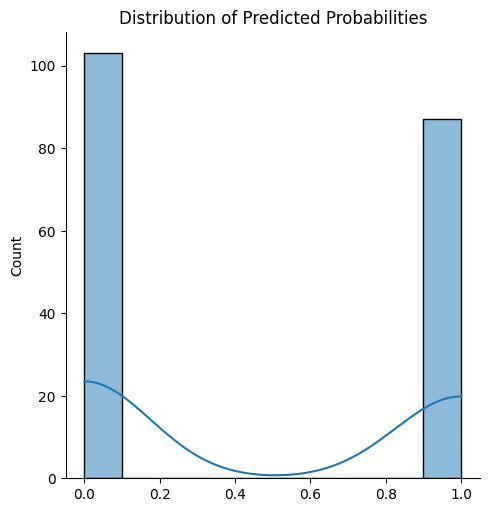

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}, 'DecisionTree': {'accuracy': 0.9997440468835501, 'precision': 0.9994893646992534, 'recall': 1.0}, 'RandomForest': {'accuracy': 0.999964696121869, 'precision': 0.9999295365265031, 'recall': 1.0}, 'SVC_Sigmoid': {'accuracy': 0.8736842105263158, 'precision': 0.9032258064516129, 'recall': 0.8484848484848485}, 'SVC_Linear': {'accuracy': 0.9210526315789473, 'precision': 0.9666666666666667, 'recall': 0.8787878787878788}, 'SVC_Poly': {'accuracy': 0.8842105263157894, 'precision': 1.0, 'recall': 0.7777777777777778}, 'SVC_RBF': {'accuracy': 0.9157894736842105, 'precision': 0.9770114942528736, 'recall': 0.8585858585858586}}


In [82]:
comparison_results["SVC_RBF"] = show_result(y_test, y_pred, labels)
print(comparison_results)

# 3. Conclusion

Stored 'comparison_results' (dict)
Stored 'x' (str)
                    accuracy  precision    recall
LogisticRegression  0.945367   0.975910  0.913500
kNN                 0.999700   0.999401  1.000000
NaiveBayes          0.914291   0.971104  0.854342
DecisionTree        0.999744   0.999489  1.000000
RandomForest        0.999965   0.999930  1.000000
SVC_Sigmoid         0.873684   0.903226  0.848485
SVC_Linear          0.921053   0.966667  0.878788
SVC_Poly            0.884211   1.000000  0.777778
SVC_RBF             0.915789   0.977011  0.858586


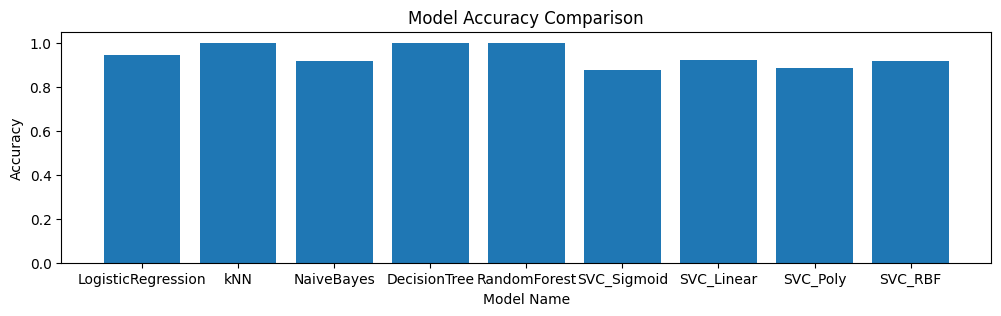

In [89]:
import pickle
file_name = "sharedfile"
pickle.dump(comparison_results, open(file_name, "wb"))
%store comparison_results 
x =  'my data'
%store x
#x is a variable to share
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(comparison_results).transpose()  # Transpose for better table view

# Print the table
print(df)

# Create a bar chart for accuracy
plt.figure(figsize=(12, 3))
plt.bar(df.index, df["accuracy"])
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

#%store